## Generating and analyzing a dataset using RDKit

This is an exploratory notebook using rdkit and other libraries to examine melting points of hydrocarbons.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors, PandasTools

In [2]:
df = pd.read_csv("data/hydrocarbons.csv")
df.head()

,Class of hydrocarbon,IUPAC name,Melting point,Boiling point,Density@20å¡C*,Flash point,Autoignition temp,pubchem_id,smiles
0,Trimetylalkane,"2,2,4-Trimethylpentane",-107.0,99.0,0.69,NaN,396,10907,CC(C)CC(C)(C)C
1,Triaromatics,Phenanthrene,99.0,338.0,1.18,171,>450,995,C1=CC=C2C(=C1)C=CC3=CC=CC=C32
2,Triaromatics,Anthracene,216.0,341.0,1.2825,NaN,NaN,8418,C1=CC=C2C=C3C=CC=CC3=CC2=C1
3,Triaromatics,1-methylanthracene,86.0,342.0,1.04799,NaN,NaN,11884,CC1=CC=CC2=CC3=CC=CC=C3C=C12
4,Triaromatics,2-methylanthracene,209.0,340.0,1.8,NaN,NaN,11936,CC1=CC2=CC3=CC=CC=C3C=C2C=C1


In [3]:
# Use pandas tools to 
PandasTools.AddMoleculeColumnToFrame(df,'smiles', 'Molecule', includeFingerprints=True)

In [4]:
df.head()

,Class of hydrocarbon,IUPAC name,Melting point,Boiling point,Density@20å¡C*,Flash point,Autoignition temp,pubchem_id,smiles,Molecule
0,Trimetylalkane,"2,2,4-Trimethylpentane",-107.0,99.0,0.69,NaN,396,10907,CC(C)CC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7fc5f994c970>
1,Triaromatics,Phenanthrene,99.0,338.0,1.18,171,>450,995,C1=CC=C2C(=C1)C=CC3=CC=CC=C32,<rdkit.Chem.rdchem.Mol object at 0x7fc5f994ca50>
2,Triaromatics,Anthracene,216.0,341.0,1.2825,NaN,NaN,8418,C1=CC=C2C=C3C=CC=CC3=CC2=C1,<rdkit.Chem.rdchem.Mol object at 0x7fc5f994cba0>
3,Triaromatics,1-methylanthracene,86.0,342.0,1.04799,NaN,NaN,11884,CC1=CC=CC2=CC3=CC=CC=C3C=C12,<rdkit.Chem.rdchem.Mol object at 0x7fc5f994ccf0>
4,Triaromatics,2-methylanthracene,209.0,340.0,1.8,NaN,NaN,11936,CC1=CC2=CC3=CC=CC=C3C=C2C=C1,<rdkit.Chem.rdchem.Mol object at 0x7fc5f994cc80>


In [6]:
# Retrieve some descriptors

descriptors_df = pd.DataFrame()
descriptors_df["Melting point"] = df["Melting point"].copy()

descriptors_df["molecular_weight"] = df["Molecule"].apply(Chem.Descriptors.MolWt)
descriptors_df["num_aromatic_rings"] = df["Molecule"].apply(Chem.Descriptors.NumAromaticRings)

In [7]:
descriptors_df.head()

,Melting point,molecular_weight,num_aromatic_rings
0,-107.0,114.232,0
1,99.0,178.234,3
2,216.0,178.234,3
3,86.0,192.261,3
4,209.0,192.261,3


In [9]:
descriptors_melt = descriptors_df.melt(id_vars="Melting point")

In [10]:
descriptors_melt.head()

,Melting point,variable,value
0,-107.0,molecular_weight,114.232
1,99.0,molecular_weight,178.234
2,216.0,molecular_weight,178.234
3,86.0,molecular_weight,192.261
4,209.0,molecular_weight,192.261


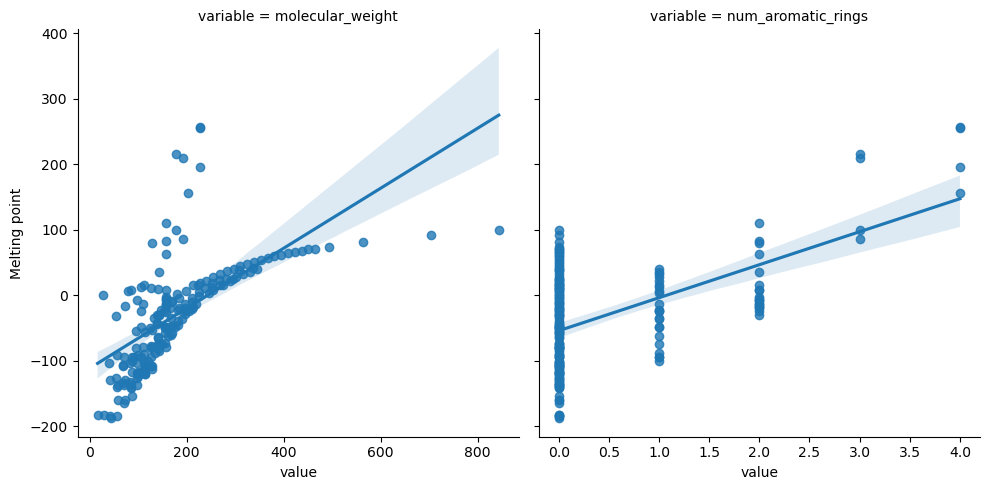

In [11]:
g = sns.lmplot(data=descriptors_melt, y="Melting point", x="value", col="variable", col_wrap=2, facet_kws={"sharex": False})

## Linear and Multilinear Regression Using SciKitLearn

Use this section to perform linear or multilinear regression using scikitlearn.

## Fitting with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
analyze = df.dropna(axis=0, subset="Melting point")

X = analyze[["molecular_weight", "num_aromatic_rings"]].to_numpy()
Y = analyze["Melting point"].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
random_forest_model = RandomForestRegressor().fit(X_train, Y_train)
yerr = random_forest_model.score(X_test, Y_test)
print(yerr)

In [ ]:
y_pred = random_forest_model.predict(X)

In [ ]:
plt.figure()
plt.scatter(Y, y_pred)